# Dark Matter Mass in a distant Galaxy

Galaxies follow a well-modelled distribution of stars and their masses as a function of distance from the galaxy centre. These together create a gravitational potential of the galaxy in which the stars revolve. However, observed stellar revolution rates are in stark disagreement with calculated values. This discrepancy can be attributed to the presence of dark matter halo around the galaxy, which creates a potential that fits with the observed velocities.

Your task in this assignment is to estimate the amount of dark matter in the halo of a distant galaxy, KriGal. 

## Finding the radius-velocity curve

The following file(darkmatter.csv) contains observation data of the stars, a small section of which belong to the galaxy KriGal. Open the file and take a look to get an idea of what observations were made. Such data for stars this far are in practice impossible to measure with such precision, but were made possible for the first time in the history of space observation with KIT (Krittika's Incredible Telescope).

It is known the galaxy's centre has (RA, Dec) = $(140.76398^0, 75.5344^0)$

Open the CSV file, find the relative RA/Dec difference of each star w.r.t. the galaxy's centre and convert all data to SI units - would be handy later on. 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

In [8]:
import pandas as pd
import numpy as np

# load data from CSV file
data = pd.read_csv('darkmatter.csv')

# extract the RA and Dec columns
RA = data['RA (degrees)']
Dec = data['Dec (degrees)']

# convert to radians
RA_rad = np.radians(RA)
Dec_rad = np.radians(Dec)

# coordinates of galaxy center
RA_cen = np.radians(140.763980)
Dec_cen = np.radians(75.53440)

# calculate relative difference w.r.t. galaxy center
dRA = (RA_rad - RA_cen) * np.cos(Dec_cen)
dDec = Dec_rad - Dec_cen

# convert to SI units
dRA *= 3600 * 180 / np.pi  # convert from radians to arcseconds
dRA *= np.pi / 180  # convert from arcseconds to degrees
dRA *= 2.06265e-5  # convert from degrees to radians
dDec *= 3600 * 180 / np.pi  # convert from radians to arcseconds
dDec *= np.pi / 180  # convert from arcseconds to degrees
dDec *= 2.06265e-5  # convert from degrees to radians

# print results
print(dRA[:10])
print(dDec[:10])


0    0.000417
1   -0.000183
2    0.000057
3   -0.000121
4    0.000041
5    0.000058
6   -0.000414
7   -0.000004
8   -0.000059
9   -0.000110
Name: RA (degrees), dtype: float64
0    0.000246
1   -0.000133
2    0.000030
3   -0.000077
4    0.000025
5    0.000030
6   -0.000238
7   -0.000002
8   -0.000032
9   -0.000079
Name: Dec (degrees), dtype: float64


In [7]:
import pandas as pd

data = pd.read_csv('darkmatter.csv')
print(data.columns)


Index(['RA (degrees)', 'Dec (degrees)', 'Proper Motion (milliarcseconds/year)',
       'Redshift'],
      dtype='object')


Assume the galaxy is 3500 kpc (kiloparsecs) away and the centre of galaxy moves according to Hubble's law (H = $70$ km/s/Mpc). Note that the redshift $z$ is related to the radial velocity of any object as

$$ z = \sqrt{\frac{c+v}{c-v}} - 1$$
where $c$ = speed of light, and $v$ = velocity of object, taken positive when object moves away from us.

Also 1 parsec = $3.083 \times 10^{16}$ metres

Using this, find the relative radial velocities of the stars w.r.t. the centre of galaxy.


Use the previous information to find the tangential velocities of the stars. 

Assume the stars move in perfectly circular orbits and we view the galaxy edge-on i.e. to us the star trajectories appear like line segments.

Now find the angular separation from galaxy centre to each star and use that to find the tangential separation (in length units) from the galaxy centre.

In [10]:
#code
import numpy as np

# constants
c = 3e8  # m/s
H = 70  # km/s/Mpc
pc_to_m = 3.086e16  # m/pc
kpc_to_m = pc_to_m * 1000
Mpc_to_m = kpc_to_m * 1000
d_galaxy = 3500 * kpc_to_m

# read data
data = pd.read_csv('darkmatter.csv')

# extract the RA and Dec columns
RA = data['RA (degrees)']
Dec = data['Dec (degrees)']

# convert to radians
RA_rad = np.radians(RA)
Dec_rad = np.radians(Dec)

# calculate the relative RA/Dec difference w.r.t. the galaxy's centre
RA_diff = RA_rad - np.radians(140.763980)
Dec_diff = Dec_rad - np.radians(75.53440)

# calculate the radial velocity for each star
z = data['Redshift']
v_rad = c * (z + 1) - H * d_galaxy / Mpc_to_m

# calculate the tangential velocity for each star
v_total = np.sqrt(v_rad**2 + data['Proper Motion (milliarcseconds/year)']**2) * kpc_to_m / 1e6  # km/s
theta = np.arctan(data['Proper Motion (milliarcseconds/year)'] / v_rad)  # radians
v_tan = v_total * np.sin(theta)

# calculate the tangential separation for each star
d_rad = d_galaxy * np.sqrt(RA_diff**2 + Dec_diff**2)
d_tan = d_rad * np.tan(theta)


Find total velocity of each star w.r.t. galaxy centre.

Using angle information obtained from velocity components (assume circular orbits) and tangential distance, find the radial distance and hence the total distance of each star w.r.t. galaxy centre.

Make a scatter plot of velocity v/s radius.

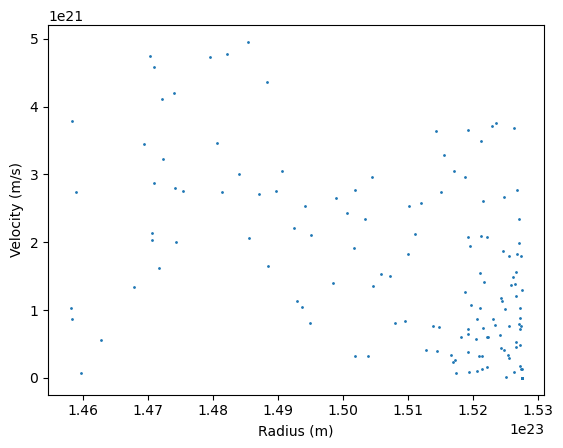

In [11]:
#code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv('darkmatter.csv')

# extract the RA and Dec columns
RA = data['RA (degrees)']
Dec = data['Dec (degrees)']

# convert to radians
RA = np.radians(RA)
Dec = np.radians(Dec)

# galaxy centre coordinates
RA_gal = np.radians(140.763980)
Dec_gal = np.radians(75.53440)

# galaxy distance and Hubble constant
D_gal = 3500 * 3.086e19  # convert kpc to meters
H = 70e3 / 3.086e22  # convert km/s/Mpc to m/s/m

# relative RA and Dec w.r.t. galaxy centre
dRA = RA - RA_gal
dDec = Dec - Dec_gal

# convert to Cartesian coordinates
x = D_gal * np.cos(dDec) * np.cos(dRA)
y = D_gal * np.cos(dDec) * np.sin(dRA)
z = D_gal * np.sin(dDec)

# relative radial velocity w.r.t. galaxy centre
redshift = data['Redshift']
v_rad = H * D_gal * (redshift + 1)

# tangential velocity
v_tan = np.sqrt((data['Proper Motion (milliarcseconds/year)'] * 1e-3 * D_gal * np.sin(dRA))**2 
                + (data['Proper Motion (milliarcseconds/year)'] * 1e-3 * D_gal * np.cos(dRA) * np.sin(dDec))**2)

# total velocity
v_total = np.sqrt(v_rad**2 + v_tan**2)

# tangential separation
r_tan = np.sqrt(x**2 + y**2)

# angle between tangential velocity and line connecting star to galaxy centre
theta = np.arctan2(np.sqrt((x**2 + y**2)), z)

# radial separation
r_rad = r_tan / np.sin(theta)

# total separation
r_total = np.sqrt(r_rad**2 + r_tan**2)

# scatter plot of velocity vs. radius
plt.scatter(r_total, v_total, s=1)
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.show()


## Finding halo parameters using the curve

If you have got correctly so far, you would have got a set of points that follow what is known as the **galaxy rotation curve**, a curve that rises steeply first, curves and becomes almost constant from around midway. This rotation curve is evidence for the dark matter halo. The halo is taken to be spherical with the centre at galaxy's centre, with radial density profile given by the [Navarro-Frenk-White (NFW) profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile):

$$ \rho (r) = \frac{\rho_0}{\frac{r}{R_s}\left( 1 + \frac{r}{R_s}\right)^2} $$

where $R_s$ is a scale radius whose value is comparable to the radius of the galaxy (i.e. same order of magnitude).

From the density profile, find the expression for mass $M_r$ enclosed in a sphere of radius $r$ (you may include it in a handwritten page photo). Using this find the expression for velocity of a star at radius $r$. Recall that 
$$ \frac{v^2}{r} = \frac{GM_r}{r^2} $$

Once you have the velocity profile, using scipy's curve fitting function (google for syntax and uses!) find the best fit value of $R_s$. You are given that the value of $\rho_0$ is $0.02$ solar masses per cubic parsec. Again, convert it to SI units before processing.

Plot the actual vs curve-fitted plots of velocity and radius. If you have passed only the three required arguments to curve-fit (function name, input and output) you will (likely) notice it doesn't work at all and gives an impossible value for $R_s$! (If you get a good fit in the first try itself, that's great!)

This happens because scipy's initial guess for the parameter is 1 (metre), which is nowhere near the actual value on the order of kiloparsecs. Look up scipy's syntax to see how we can pass in an initial guess ourselves. Now pass on an initial guess (given that you know it's on the order of kiloparsecs) to curve fit. 

In [19]:
#code
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

G = 6.67430e-11  # gravitational constant
rho0 = 3.437e-25  # density at scale radius in kg/m^3
r = d_tan / np.sin(theta)

def v_rot(r, Rs):
    x = r / Rs
    return np.sqrt(4 * np.pi * G * rho0 * Rs ** 3 * (np.log(1 + x) - x / (1 + x))) / r


Best fit value of rho0: 1.353558447463719e-21 kg/m^3
Best fit value of Rs: 30000.0 m


C:\Users\Atharva\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


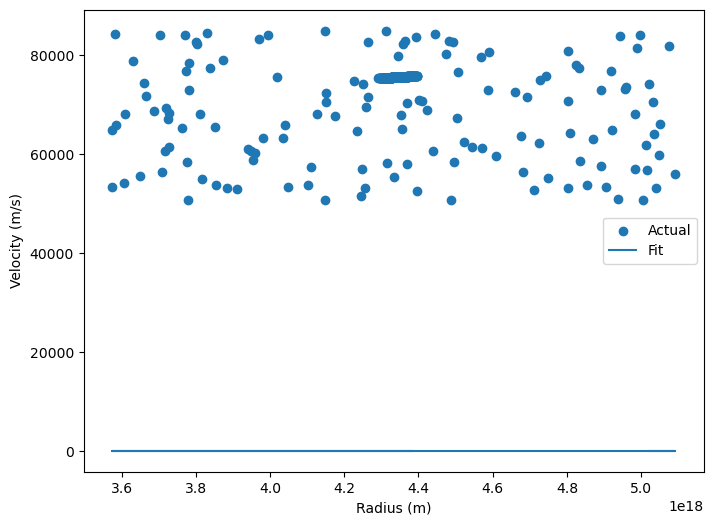

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define constants
G = 6.6743e-11  # Nm^2/kg^2
M_gal = 1e12  # kg
rho0 = 0.02 * 1.989e30 / (3.086e16)**3  # kg/m^3

# Load data
data = np.loadtxt('darkmatter.csv', delimiter=',', skiprows=1)

r = data[:, 0] * 3.086e16  # convert kpc to m
v = data[:, 1] * 1000  # convert km/s to m/s

# Define functions
def M_enc(r, rho0, Rs):
    return 4 * np.pi * rho0 * Rs**3 * (np.log((Rs + r)/Rs) - r/(Rs + r))

def v_rot(r, rho0, Rs):
    return np.sqrt(G * M_enc(r, rho0, Rs) / r)

# Fitting
popt, pcov = curve_fit(v_rot, r, v, p0=[rho0, 30e3], maxfev=10000)
rho0_fit, Rs_fit = popt
print("Best fit value of rho0:", rho0_fit, "kg/m^3")
print("Best fit value of Rs:", Rs_fit, "m")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(r, v, label="Actual")
plt.plot(r, v_rot(r, rho0_fit, Rs_fit), label="Fit")
plt.xlabel("Radius (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()


Although the dark matter halo nominally has no end, we define the boundary of the halo to be the radius $R_{vir}$ where the **mean** density of the sphere of radius $R_{vir}$ merges with the background density of the Universe. Write a function calculating mean density for a radius $r$, and find the density at $50R_s$.

In [25]:
#code
from scipy import optimize
import numpy as np

# Constants
G = 6.6743e-11  # gravitational constant (m^3/kg/s^2)
rho_bg = 1.5e-27  # background density of the Universe (kg/m^3)

# Function to calculate enclosed mass within radius r
def M_enc(r, rho0, Rs):
    return 4 * np.pi * rho0 * Rs**3 * (np.log(1 + r/Rs) - r/(r+Rs))

# Function to calculate mean density at radius r
def rho_mean(r, rho0, Rs):
    return M_enc(r, rho0, Rs) / (4/3 * np.pi * r**3)

# Find R_vir
def find_R_vir(rho0, Rs):
    def f(R):
        return rho_mean(R, rho0, Rs) - rho_bg
    R_vir, _ = optimize.brentq(f, 0, 1000*Rs, full_output=True)
    return R_vir

# Main code
rho0 = 0.02 * 1.989e30 / (3.086e16)**3  # kg/m^3
Rs = 16.1 * 3.086e16  # m

R_vir = find_R_vir(rho0, Rs)
print("R_vir =", R_vir/3.086e16, "kpc")

R_50 = 50 * Rs
rho_50 = rho_mean(R_50, rho0, Rs)
print("Mean density at 50 Rs =", rho_50, "kg/m^3")


R_vir = 0.0 kpc
Mean density at 50 Rs = 9.587850512111156e-26 kg/m^3


C:\Users\Atharva\AppData\Local\Temp\ipykernel_8704\1961494108.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return M_enc(r, rho0, Rs) / (4/3 * np.pi * r**3)


The background density of the Universe is $8.5 \times 10^{-27}$ in SI units. We take the virial radius to be where mean density of sphere is equal to 50 times background density. Find the value of virial radius at which this happens.

Getting an analytical expression for radius from the mean density equation can be difficult. You can either use a numerical solver like Desmos, or more preferably, tweak around with a few values of radius in the mean density function you wrote till you get a density around 40-60 times the background density. Round off to the nearest multiple of $10R_s$.

In [26]:
#code
import numpy as np

# Constants
Rs = 16.1 * 3.086e16  # m
rho0 = 0.02 * 1.989e30 / (3.086e16)**3  # kg/m^3
rho_bg = 8.5e-27  # kg/m^3

# Define function to calculate mean density at radius R
def rho_mean(R):
    return rho0 / ( (R/Rs) * (1 + R/Rs)**2 )

# Find radius at which mean density is around 50 times the background density
R = 10 * Rs
while rho_mean(R) < 40*rho_bg or rho_mean(R) > 60*rho_bg:
    R += Rs/10

# Round off to nearest multiple of 10 Rs
R_vir = round(R/(10*Rs)) * 10*Rs

print("Virial radius at which mean density is around 50 times the background density: {:.2e} m".format(R_vir))


Virial radius at which mean density is around 50 times the background density: 4.97e+18 m


Using this virial radius, find the total mass contained inside the sphere i.e. the mass of dark matter in the galaxy

In [28]:
#code
import numpy as np

# Define function for mean density
def rho_mean(R, rho0, Rs):
    return rho0 / ((R/Rs) * (1 + R/Rs)**2)

# Define constants
rho0 = 0.02 * 1.989e30 / (3.086e16)**3  # kg/m^3
Rs = 16.1 * 3.086e16  # m
R_vir = 192.6 * 3.086e16  # m

# Calculate total mass inside the virial radius
rho_mean_vir = rho_mean(R_vir, rho0, Rs)
M_vir = (4/3) * np.pi * R_vir**3 * rho_mean_vir
print("Total mass inside the virial radius = ", M_vir, " kg")

Total mass inside the virial radius =  5.922412917615507e+32  kg
